# Part 1:-

### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
### Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. 
### If there are data quality issues, please report them.

### Project Objectives

This Task aims in finding the patterns of logins for a 15 min interval.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_json('logins.json')

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data['count'] = 1

In [5]:
data.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [6]:
data.set_index('login_time',inplace=True)

#### Aggregating the login counts based on 15minute time intervals

In [7]:
df = data.resample('15min').sum()

In [8]:
#df.rename(columns={'login': 'login_time'},inplace=True)
df.columns

Index(['count'], dtype='object')

In [9]:
df.reset_index(inplace=True)

In [10]:
df.head(10)

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


In [11]:
df.columns

Index(['login_time', 'count'], dtype='object')

###### Visualizing the Data 

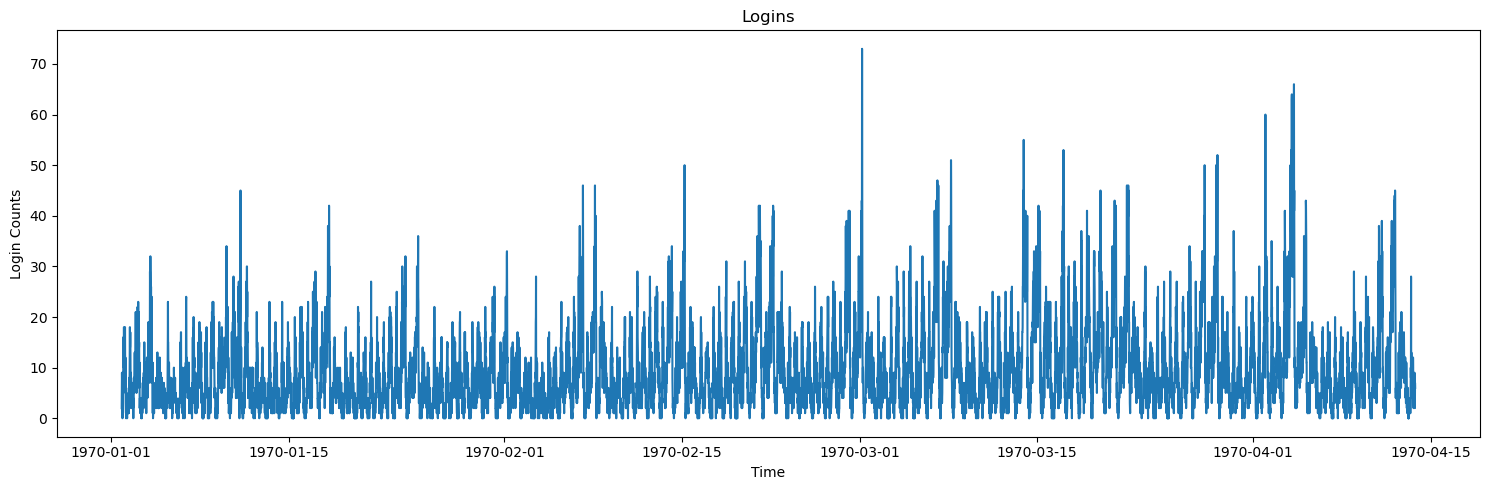

In [12]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df['login_time'],df['count'])
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.title("Logins")
plt.tight_layout()
plt.show()

#### We can infer various trends in this data for e.g. Busiest Day of the Week, Busiest Time of the Day, Busiest Month of the Year

##### Finding Busiest Day of Week

In [13]:
df.set_index('login_time',inplace=True)

In [14]:
df_monday = df.resample('W-MON').sum() 

In [15]:
df_monday.head(20)

,count
login_time,
1970-01-05,2833
1970-01-12,5294
1970-01-19,4956
1970-01-26,4744
1970-02-02,4881
1970-02-09,5487
1970-02-16,5990
1970-02-23,7099
1970-03-02,6538


In [16]:
df_tuesday = df.resample('W-TUE').sum()
df_wednesday = df.resample('W-WED').sum()
df_thursday = df.resample('W-THU').sum()
df_friday = df.resample('W-FRI').sum()
df_saturday = df.resample('W-SAT').sum()
df_sunday = df.resample('W-SUN').sum()
df_daily = df.resample('D').sum()

In [17]:
df_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


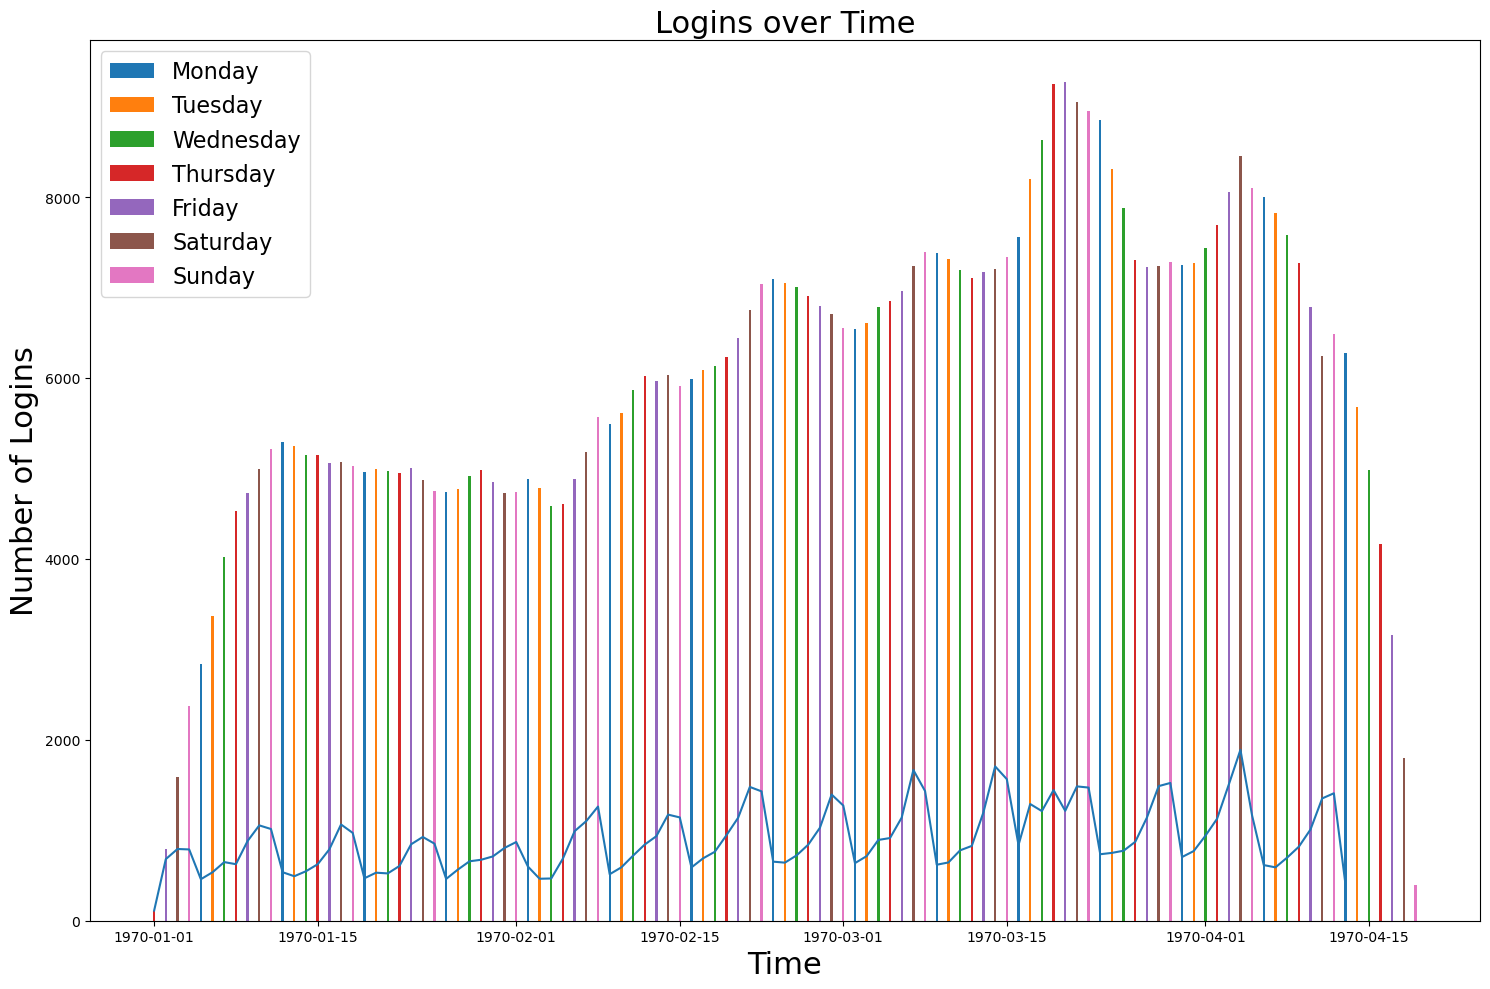

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Number of Logins', fontsize = 22)
plt.title('Logins over Time', fontsize = 22)
plt.bar(df_monday.index, df_monday['count'], label='Monday',width = 0.2)
plt.bar(df_tuesday.index, df_tuesday['count'], label='Tuesday',width = 0.2)
plt.bar(df_wednesday.index, df_wednesday['count'], label='Wednesday',width = 0.2)
plt.bar(df_thursday.index, df_thursday['count'], label='Thursday',width = 0.2)
plt.bar(df_friday.index, df_friday['count'], label='Friday',width = 0.2)
plt.bar(df_saturday.index, df_saturday['count'], label='Saturday',width = 0.2)
plt.bar(df_sunday.index, df_sunday['count'], label='Sunday',width = 0.2)
plt.plot(df_daily.index,df_daily['count'])
plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()
plt.show()


### From the above Graph it is inferred that Weekends have more logins and Friday has the Highest Logins among all days in the Time Period.

##### Finding Busiest Time of the Day

In [19]:
hourly_logins = df.resample('H').sum()
hourly_logins.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [20]:
day_of_week = list(hourly_logins.index.dayofweek)

In [21]:
hourly_logins['day_of_week'] = day_of_week

In [22]:
hourly_logins['hour'] = [time.hour for time in hourly_logins.index]

In [23]:
hourly_logins.head()

,count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,24,3,20
1970-01-01 21:00:00,9,3,21
1970-01-01 22:00:00,21,3,22
1970-01-01 23:00:00,58,3,23
1970-01-02 00:00:00,53,4,0


In [24]:
avg_hourly_logins = hourly_logins.groupby(['hour'])['count'].sum()

In [25]:
avg_hourly_logins.head()

hour
0    5993
1    6317
2    5800
3    4831
4    5034
Name: count, dtype: int64

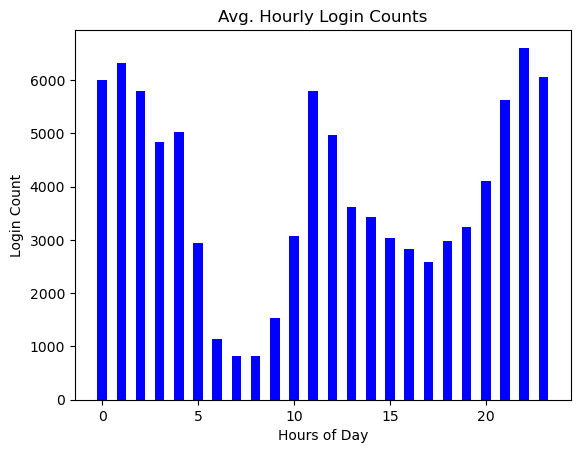

In [26]:
plt.bar(avg_hourly_logins.index, avg_hourly_logins, width=0.5,color='b')
plt.xlabel('Hours of Day')
plt.ylabel('Login Count')
plt.title('Avg. Hourly Login Counts')
plt.show()

### We find that we have more logins between Hours 0-4, spike in 11th Hours and then again high between 21st - 23rd Hour.

#### Let us see if there is any particular Day which has more Login Counts in any specific hours.

In [27]:
# create dataframe of the average number of logins for each hour of each day
avg_weekly_hourly_logins = pd.pivot_table(hourly_logins, values = 'count', index = 'hour', columns = 'day_of_week', aggfunc=np.mean).rename(columns= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
# stack
avg_hourly_logins = avg_weekly_hourly_logins.stack(level=['day_of_week'])
# name the stack
avg_hourly_logins.name = 'avg_num_logins'
avg_hourly_logins_df = avg_hourly_logins.reset_index()

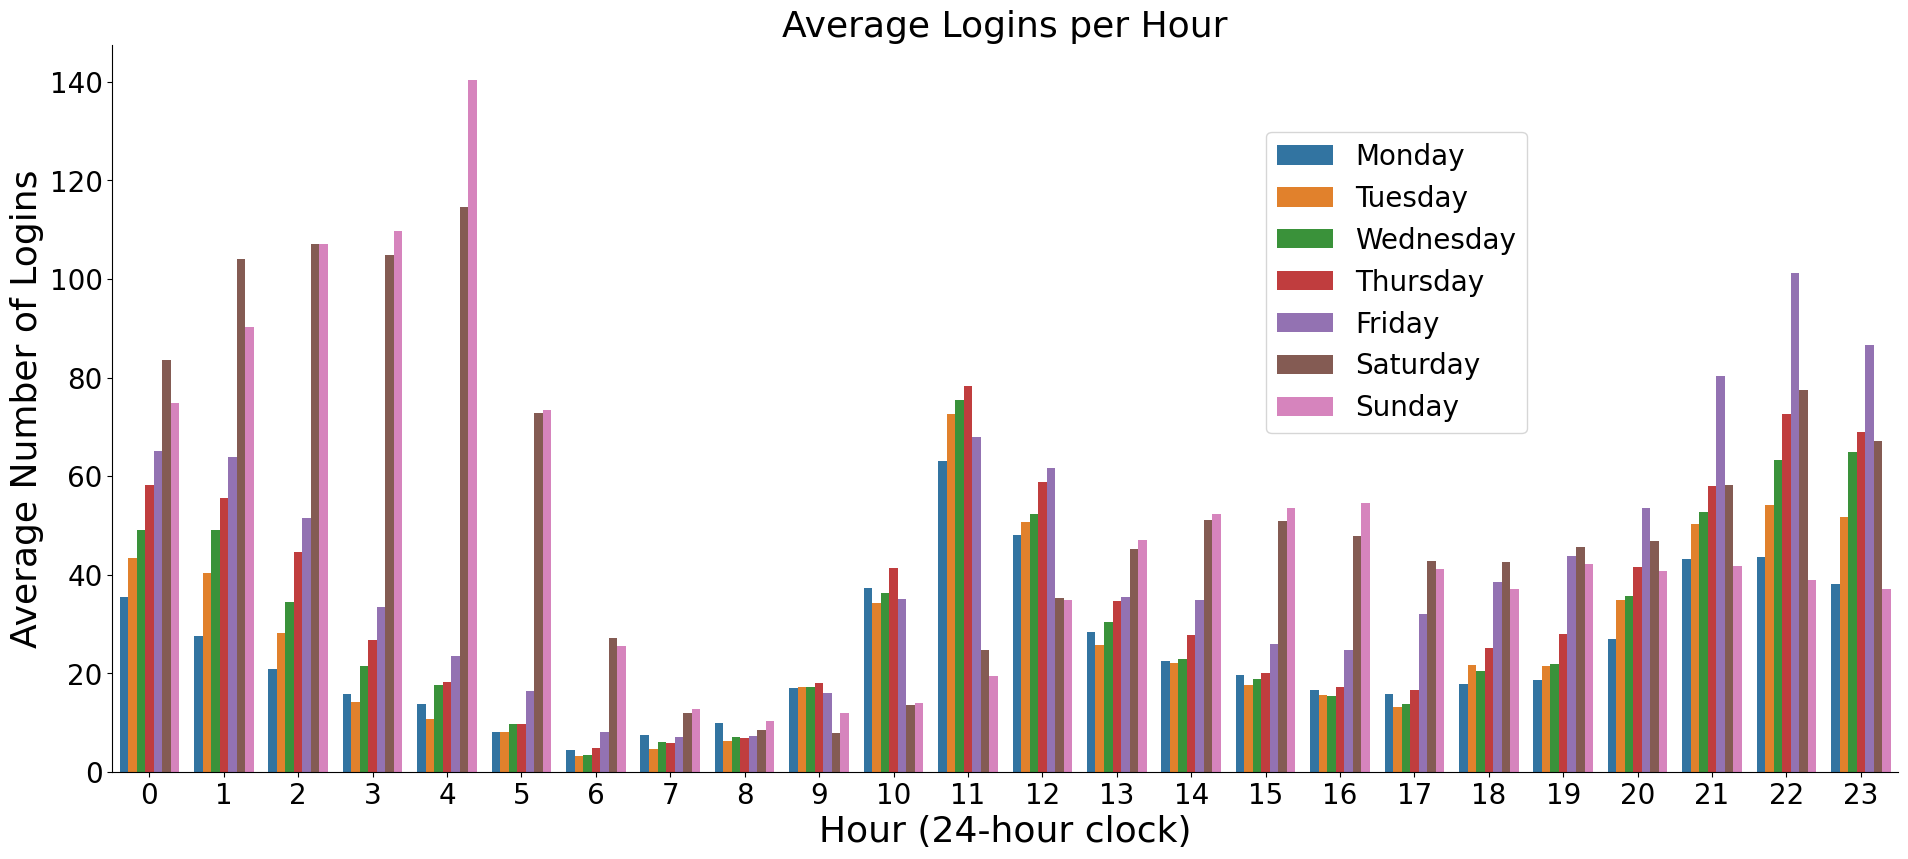

In [28]:
# plot average hourly use
sns.catplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df, kind = 'bar', 
            hue='day_of_week',height=8, aspect=11.7/5, legend=False)
ax = plt.gca()
ax.set_title('Average Logins per Hour', fontsize = 26)
ax.set_xlabel('Hour (24-hour clock)', fontsize = 26)
ax.set_ylabel('Average Number of Logins', fontsize = 26)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.1, 0.2),fontsize=20)

#### Sunday shows the Highest Logins between 4-5 am. On an Average, Weekends have more logins than Weekdays.

# Part 2:-

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Solution:-

The Key Metric I will choose here is the Number of Cross City Rides Drivers make throughout the Day and Night. This would give an estimate of the number of Trips made from both cities at day and night.

I would then do a Null Hypothesys Testing where my assumptions will be as below:-

#### H0: There is no increase in the Number of Trips made between 2 Cities when the Toll is Reimbursed.

#### H1: There is an increase of Number of Cross City Trips when Tolls are Reimbursed.

I would do a one tailed Z-Test to determine the p value.

If the p value is less than 0.05 then I would reject the Null Hypothesys and conclude that Toll Reimbursement does play an effect on Drivers to do Cross City Trips.

If the p value is more than 0.05 then the Reimbursement Program has no effect on the Number of Trips made and we would recommend rejecting the Program.

# Part 3:-

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [29]:
df1 = pd.read_json('ultimate_data_challenge.json')

In [30]:
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
df1.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [33]:
df1.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [34]:
#Replacing The Null Values with Mean Values for the Numerical Fields
df1['avg_rating_of_driver'] = df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean())

In [35]:
df1['avg_rating_by_driver'] = df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean())

In [36]:
# Replacing the Categorical value with most frequent value 
df1['phone'] = df1['phone'].fillna(df1['phone'].mode()[0])

In [37]:
df1.shape

(50000, 12)

In [38]:
df1.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [39]:
df1['phone'].value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [40]:
df1.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


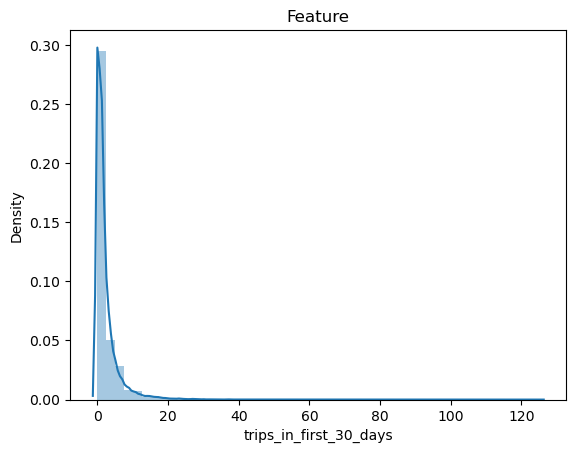

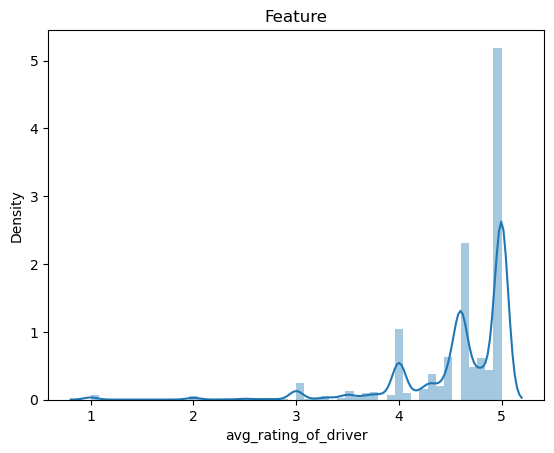

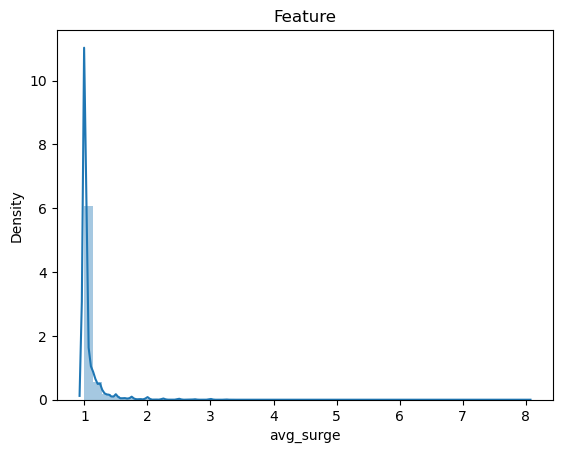

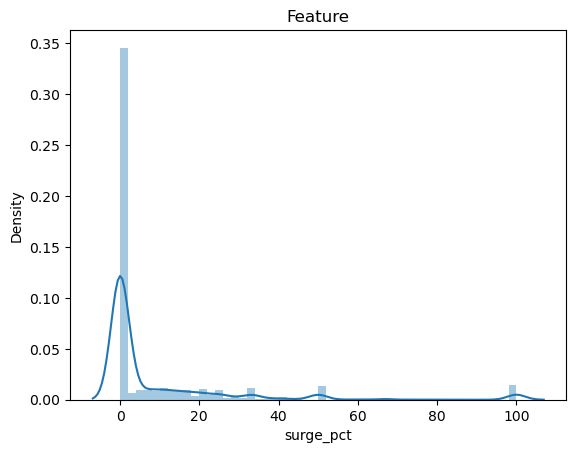

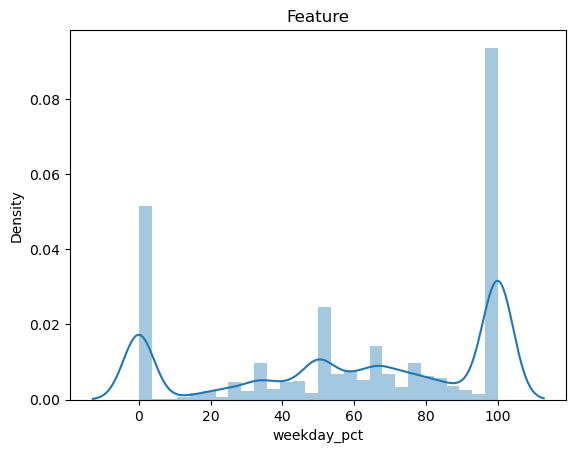

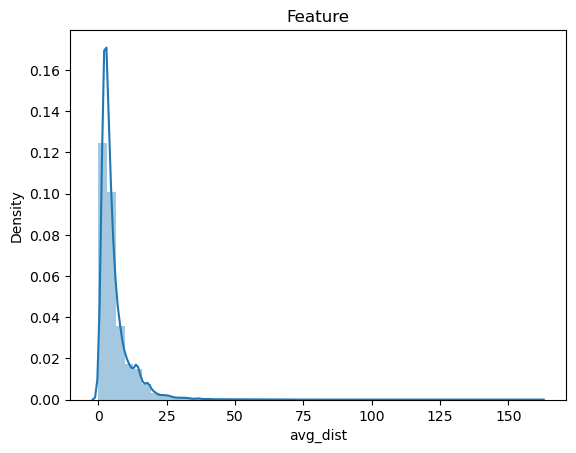

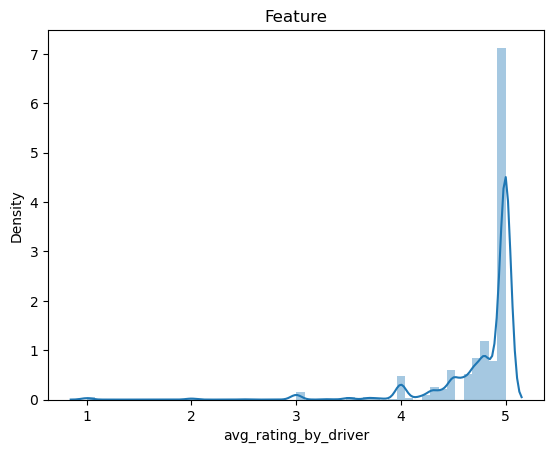

In [90]:
#Plotting Numerical Features
num_features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
                'weekday_pct', 'avg_dist','avg_rating_by_driver']
for feature in num_features:
    sns.distplot(df1[feature])
    plt.title('Feature')
    plt.show()

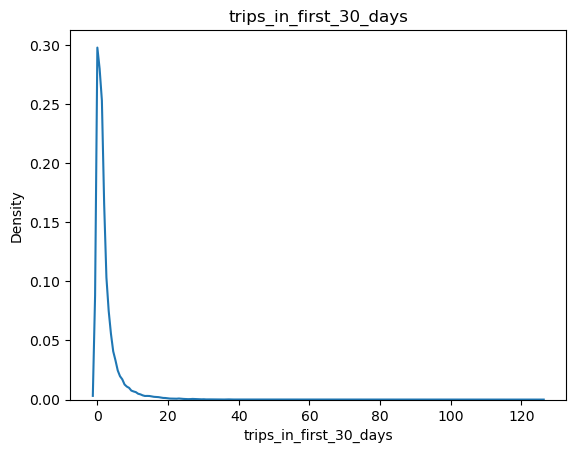

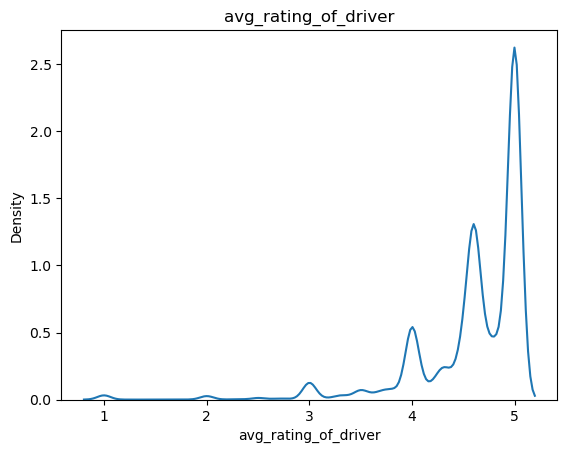

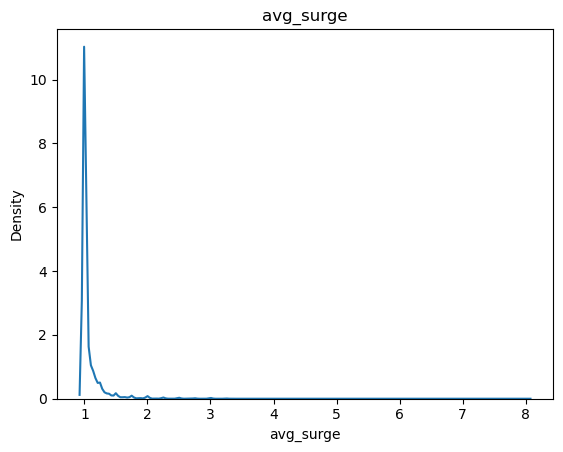

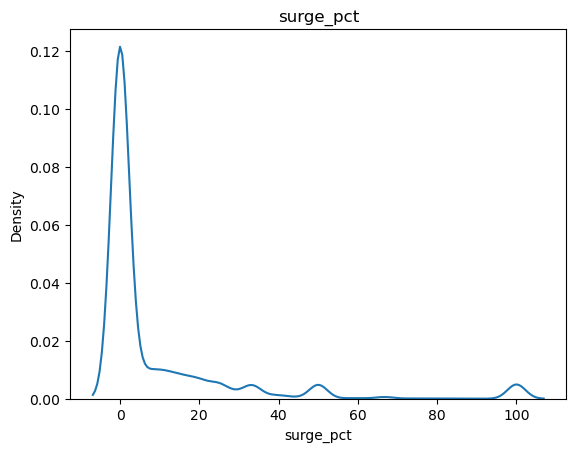

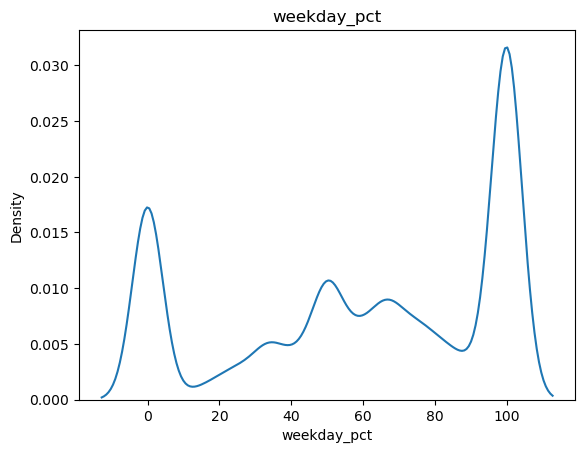

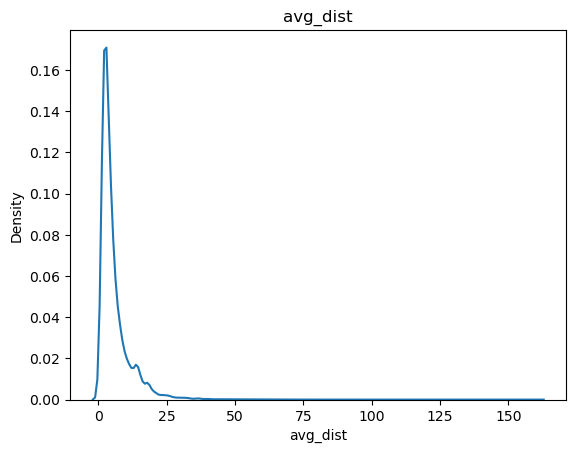

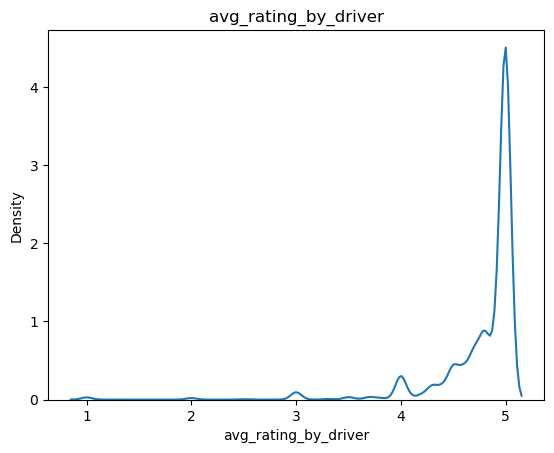

In [105]:
for feature in num_features:
    sns.kdeplot(df1[feature])
    plt.title(feature)
    plt.show();

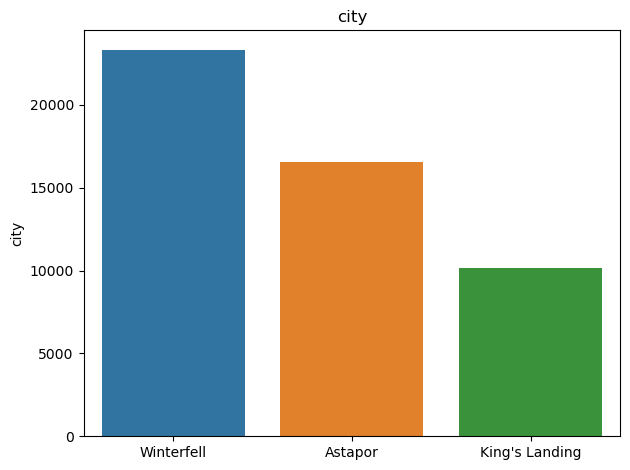

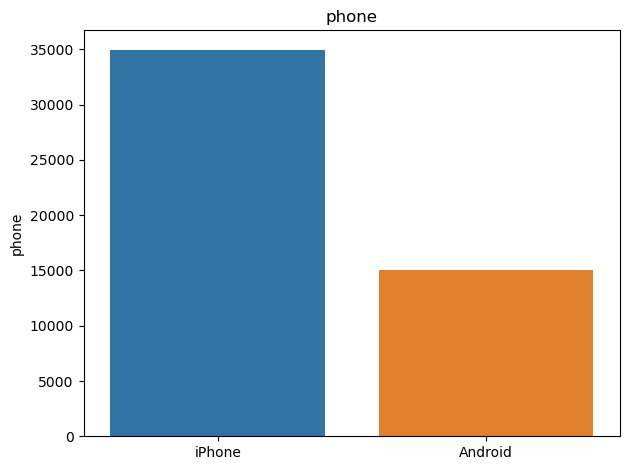

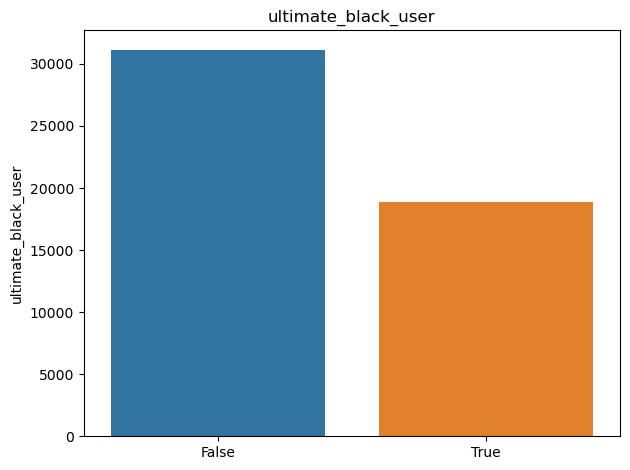

In [102]:
###Plotting Categorical Features
cat_feature = ['city', 'phone', 'ultimate_black_user']
for feature in cat_feature:
    sns.barplot(x = list(df1[feature].value_counts().index), y = df1[feature].value_counts())
    plt.title(feature)
 #  plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [43]:
df1.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [44]:
df1['retained'] = [date >= '2014-06-01' for date in df1.last_trip_date]
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [45]:
df1.shape

(50000, 13)

In [112]:
active_users   = df1[df1['retained'] == True]
inactive_users = df1[df1['retained'] == False]

In [113]:
inactive_users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0


In [117]:
frac_retained = (len(active_users)/len(df1))*100
print('{:.2f}% of Users were retained'.format(frac_retained))

37.61% of Users were retained


### 37.6 % of the Users Retained after end of June

In [57]:
df1['retained'] = df1['retained'].astype(int)

In [58]:
df1['retained'].unique()

array([1, 0])

In [120]:
# We do One Hot Encoding for converting the Non Numerical Categorical Variable
df = df1.drop(columns=['signup_date', 'last_trip_date'])
df= pd.get_dummies(df)
#Our Target Variable is df1['retained']
X = df.drop(columns=['retained'],axis=1)
y = df['retained'] 

In [121]:
X.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [122]:
#split the data to train and test set
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [124]:
X_train.shape

(40000, 13)

In [126]:
#y_train = y_train.reshape(-1, 1)

In [127]:
#y_train.shape

In [128]:
#y_test = y_test.reshape(-1, 1)

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [130]:
y_pred[0:5]

array([1, 0, 0, 0, 0])

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc_score = accuracy_score(y_pred,y_test)

In [132]:
acc_score

0.7142

In [133]:
cm = confusion_matrix(y_pred,y_test)

In [134]:
cm

array([[5241, 1880],
       [ 978, 1901]], dtype=int64)

### Logistic Regression has a 71% Accuracy Score. We will now do Hyperparameter Optimization to see if we can improve the Model Performance

### We will try Random Forest to see if it improves the Model Performance

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [144]:
rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

In [145]:
print(cv_scores)

[0.752875 0.766875 0.761125 0.7635   0.756875]


In [147]:
print('The Average 5 Fold CV Score is {:2f}'.format(np.mean(cv_scores)))

The Average 5 Fold CV Score is 0.760250


### Since this is better than Logistic Regression, we will do Hyperparameter Tuning to see if it further improves the Model Performance

In [137]:
# Create the hyperparameter grid
n_estimators = [10,20,50,100,200]
max_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_estimators, 'max_features': max_options, 'oob_score': oob_options}

In [148]:
rf_cv = GridSearchCV(rf,param_grid=param_grid,cv=5)
rf_cv.fit(X_train,y_train)
y_predict = rf_cv.predict(X_test)

In [151]:
print('Best_parameters:',rf_cv.best_params_)

Best_parameters: {'max_features': 8, 'n_estimators': 200, 'oob_score': True}


In [153]:
print('Best Score:', rf_cv.best_score_)

Best Score: 0.761325


In [154]:
print('Accuracy Score:', accuracy_score(y_predict,y_test))

Accuracy Score: 0.7514


In [158]:
print('Classification Report:\n',classification_report(y_test,y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      6219
           1       0.68      0.65      0.66      3781

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



#### So we infer that the best parameters are {'max_features': 8, 'n_estimators': 200, 'oob_score': True} with a Best Score of 76.14%

#### We now predict the Data using the best parameters chosen above

In [159]:
rf_cv = RandomForestClassifier(n_estimators=200,max_features=8,oob_score=True)
rf_cv.fit(X_train,y_train)
y_predict = rf_cv.predict(X_test)

In [160]:
print('Accuracy Score is:',accuracy_score(y_predict,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predict))

Accuracy Score is: 0.7523
Confusion Matrix:
 [[5057 1162]
 [1315 2466]]


In [161]:
cm = confusion_matrix(y_test,y_predict)
pd.DataFrame(cm,index=range(0,2),columns=range(0,2))

,0,1
0,5057,1162
1,1315,2466


Text(0.5, 1.0, 'ROC Curve')

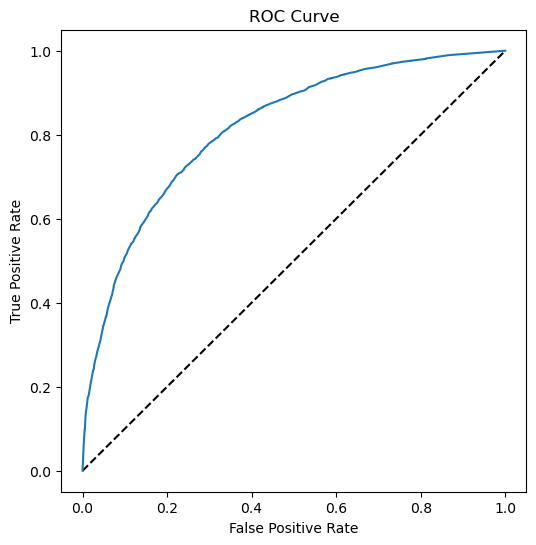

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf_cv.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [167]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_proba)))

AUC: 0.8171


### The Model has an Accuracy Score of 75.23% and AUC Score of 81.71%

#### Feature Importance:-

In [168]:
fi = pd.DataFrame(list(zip(X.columns, rf_cv.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
6,avg_dist,0.301911
7,avg_rating_by_driver,0.141596
5,weekday_pct,0.118288
3,surge_pct,0.087475
1,avg_rating_of_driver,0.080810


The Top 3 Features are:- 

1. avg_dist
2. avg_rating_by_driver
3. weekday_pct	

So our Recommendations to Ultimate are as below:-

1. Encourage Users to take longer Trips after signing up
2. Make plans so that riders make more weekday trips